## About Dataset

This dataset contains information about used cars.
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
The columns in the given dataset are as follows:

- name
- year
- selling_price
- km_driven
- fuel
- seller_type
- transmission
- Owner

prices are in lakhs

## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.isnull().sum() # there is no null values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# EDA

In [8]:
car_counts = df['Car_Name'].value_counts().head(10)
car_counts

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
i20                           9
innova                        9
grand i10                     8
Royal Enfield Classic 350     7
Name: Car_Name, dtype: int64

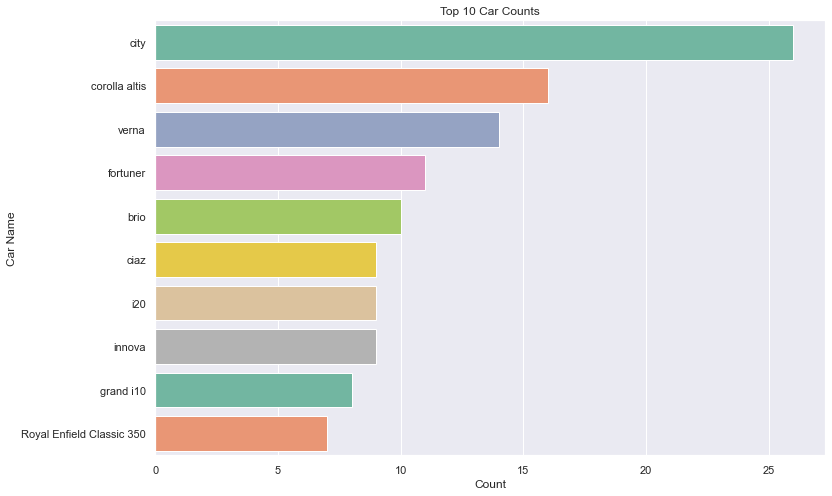

In [9]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,8)})
sns.countplot(y='Car_Name', data=df, order=car_counts.index, palette='Set2')
plt.title('Top 10 Car Counts')
plt.xlabel('Count')
plt.ylabel('Car Name')
plt.show()


Most number of cars are honda city and corolla altis

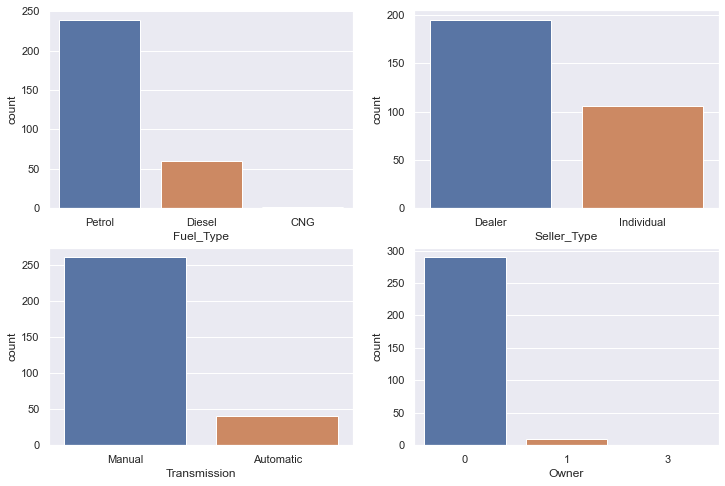

In [10]:
sns.set(style='darkgrid')
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
sns.countplot(x='Fuel_Type', data=df, ax=axs[0][0])
sns.countplot(x='Seller_Type', data=df, ax=axs[0][1])
sns.countplot(x='Transmission', data=df, ax=axs[1][0])
sns.countplot(x='Owner', data=df, ax=axs[1][1])
plt.show()

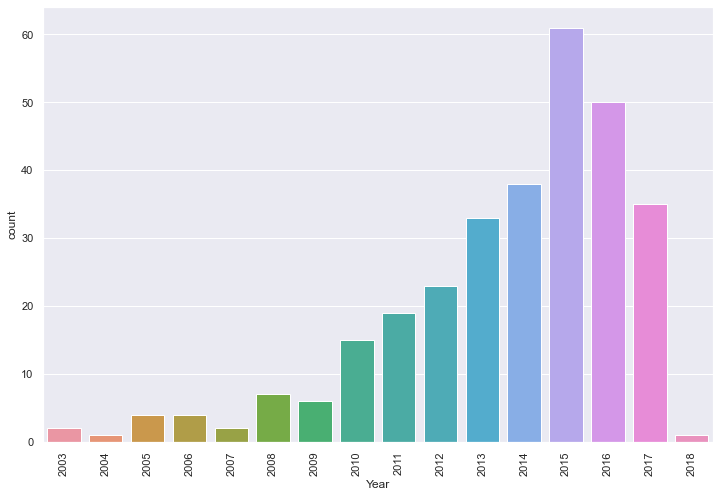

In [11]:
sns.countplot(x='Year',data=df)
plt.xticks(rotation=90);

- most number of cars are from year 2015 and 2016
- least number of cars are from 2003,04, 05, 06, 07, 08, 09 and 2018

In [12]:
# feature transformation

import datetime

# Calculate the age of each car
current_year = datetime.datetime.now().year
df['Age'] = current_year - df['Year']

# Drop the Year column
df.drop('Year', axis=1, inplace=True)


In [13]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


#### Distribution of numerical features

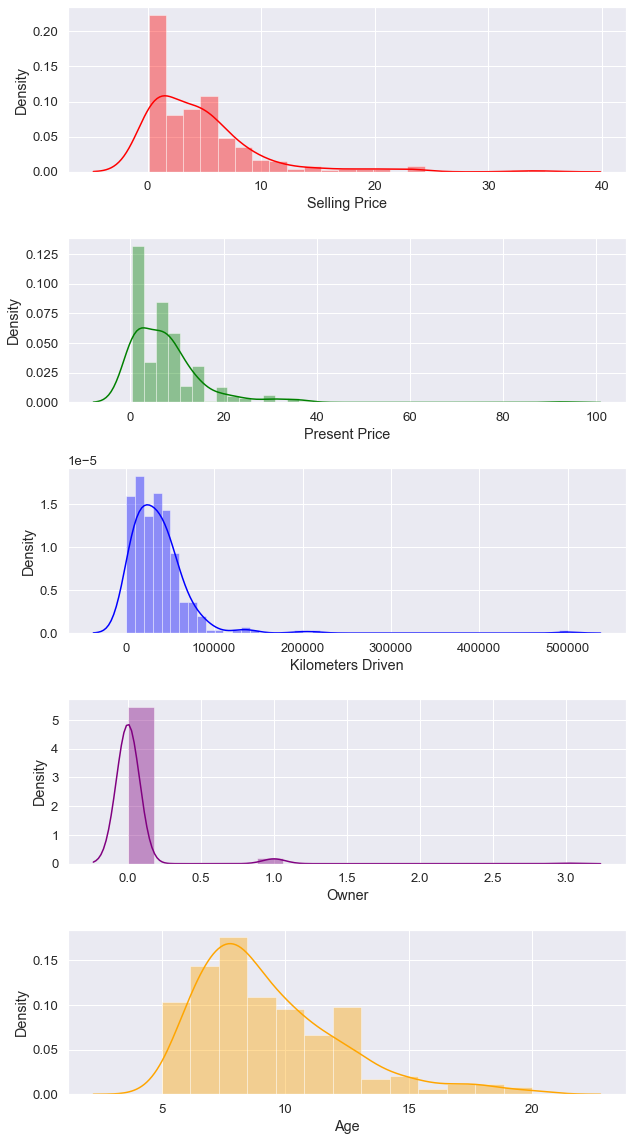

In [14]:
sns.set(style="darkgrid", font_scale=1.2)
fig, axs = plt.subplots(nrows=5, figsize=(10, 20))

# Plot the distribution of Selling_Price
sns.distplot(df['Selling_Price'], ax=axs[0], color='red')
axs[0].set(xlabel='Selling Price', ylabel='Density')

# Plot the distribution of Present_Price
sns.distplot(df['Present_Price'], ax=axs[1], color='green')
axs[1].set(xlabel='Present Price', ylabel='Density')

# Plot the distribution of Kms_Driven
sns.distplot(df['Kms_Driven'], ax=axs[2], color='blue')
axs[2].set(xlabel='Kilometers Driven', ylabel='Density')

# Plot the distribution of Owner
sns.distplot(df['Owner'], ax=axs[3], color='purple')
axs[3].set(xlabel='Owner', ylabel='Density')

# Plot the distribution of Age
sns.distplot(df['Age'], ax=axs[4], color='orange')
axs[4].set(xlabel='Age', ylabel='Density')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Show the plots
plt.show()


- They all are right skewed

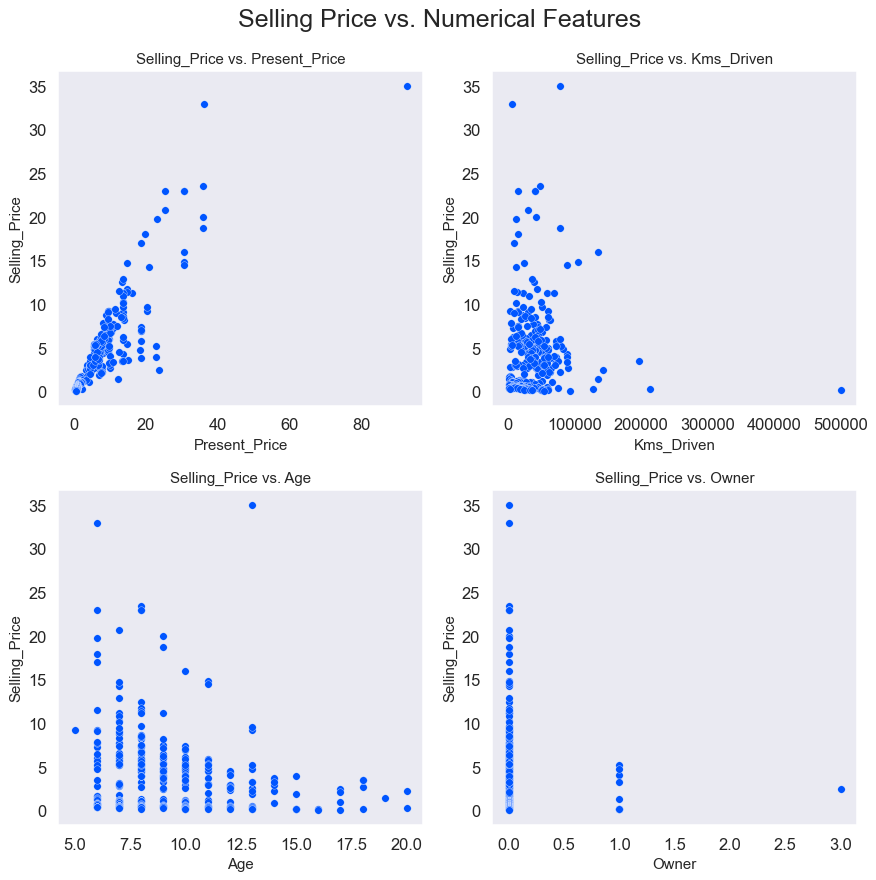

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), dpi=90)
num_features = ['Present_Price', 'Kms_Driven', 'Age', 'Owner']
target = 'Selling_Price'
c = '#0055ff'

for i in range(len(num_features)):
    row = i // 2
    col = i % 2
    ax[row, col].scatter(df[num_features[i]], df[target], color=c, edgecolors='w', linewidths=0.25)
    ax[row, col].set_title('{} vs. {}'.format(target, num_features[i]), size=12)
    ax[row, col].set_xlabel(num_features[i], size=12)
    ax[row, col].set_ylabel(target, size=12)
    ax[row, col].grid()

plt.suptitle('Selling Price vs. Numerical Features', size=20)
plt.tight_layout()
plt.show()



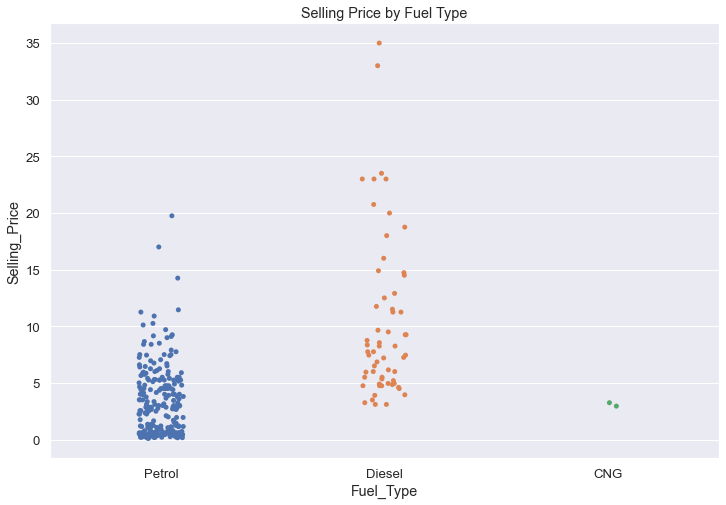

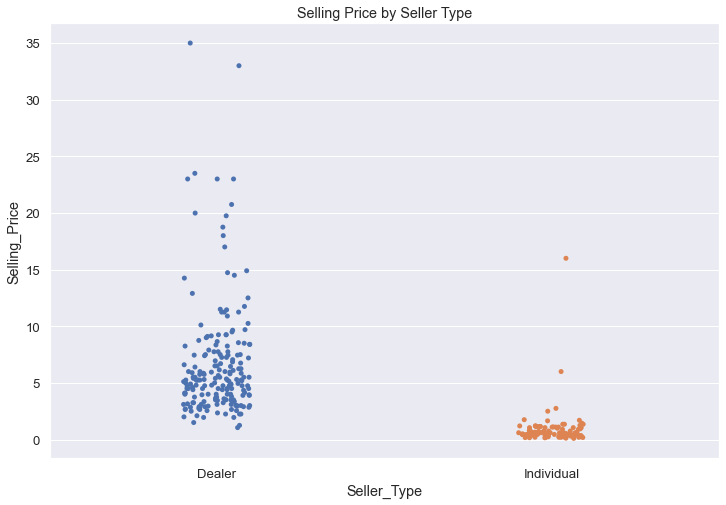

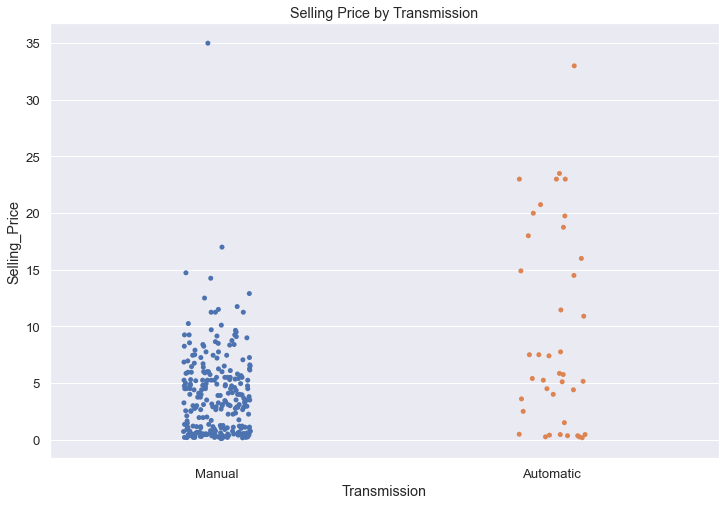

In [16]:
sns.stripplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title('Selling Price by Fuel Type')
plt.show()

sns.stripplot(x='Seller_Type', y='Selling_Price', data=df)
plt.title('Selling Price by Seller Type')
plt.show()

sns.stripplot(x='Transmission', y='Selling_Price', data=df)
plt.title('Selling Price by Transmission')
plt.show()


- Diesel cars have a higher selling price compared to those that use petrol or CNG.
- Dealership-sold cars have a higher selling price compared to individual-sold cars.
- Automatic cars have a higher selling price compared to manual cars.

In [17]:
# Highest selling price car

highest_selling_price_car = df.sort_values('Selling_Price', ascending=False).iloc[0]
print("The car with the highest selling price is:")
print(highest_selling_price_car)

The car with the highest selling price is:
Car_Name         land cruiser
Selling_Price            35.0
Present_Price            92.6
Kms_Driven              78000
Fuel_Type              Diesel
Seller_Type            Dealer
Transmission           Manual
Owner                       0
Age                        13
Name: 86, dtype: object


In [18]:
# lowest selling price

lowest_selling_price_car = df.sort_values('Selling_Price', ascending=True).iloc[0]
print("The car with the lowest selling price is:")
print(lowest_selling_price_car)

The car with the lowest selling price is:
Car_Name         Bajaj Pulsar 150
Selling_Price                 0.1
Present_Price                0.75
Kms_Driven                  92233
Fuel_Type                  Petrol
Seller_Type            Individual
Transmission               Manual
Owner                           0
Age                            17
Name: 200, dtype: object


# Encoding

In [19]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [20]:
df['Fuel_Type'] = df['Fuel_Type'].map({'Petrol':0,'Diesel':1,'CNG':2})

In [21]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [22]:
df['Seller_Type'] = df['Seller_Type'].map({'Dealer':0,'Individual':1})

In [23]:
df['Transmission'].unique()


array(['Manual', 'Automatic'], dtype=object)

In [24]:
df['Transmission'] =df['Transmission'].map({'Manual':0,'Automatic':1})

In [25]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,0,0,0,0,9
1,sx4,4.75,9.54,43000,1,0,0,0,10
2,ciaz,7.25,9.85,6900,0,0,0,0,6
3,wagon r,2.85,4.15,5200,0,0,0,0,12
4,swift,4.60,6.87,42450,1,0,0,0,9


# correlation analysis

In [26]:
correlation = df.corr()
correlation.style.background_gradient(cmap='summer')

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
Selling_Price,1.000000,0.878983,0.029187,0.509467,-0.550724,0.367128,-0.088344,-0.236141
Present_Price,0.878983,1.000000,0.203647,0.440415,-0.512030,0.348715,0.008057,0.047584
Kms_Driven,0.029187,0.203647,1.000000,0.166801,-0.101419,0.162510,0.089216,0.524342
Fuel_Type,0.509467,0.440415,0.166801,1.000000,-0.352415,0.080466,-0.055705,-0.053643
Seller_Type,-0.550724,-0.512030,-0.101419,-0.352415,1.000000,-0.063240,0.124269,0.039896
Transmission,0.367128,0.348715,0.162510,0.080466,-0.063240,1.000000,0.050316,0.000394
Owner,-0.088344,0.008057,0.089216,-0.055705,0.124269,0.050316,1.000000,0.182104
Age,-0.236141,0.047584,0.524342,-0.053643,0.039896,0.000394,0.182104,1.000000


# Train-test split

In [27]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
y = df['Selling_Price']

In [28]:
X.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,5.59,27000,0,0,0,0,9
1,9.54,43000,1,0,0,0,10
2,9.85,6900,0,0,0,0,6
3,4.15,5200,0,0,0,0,12
4,6.87,42450,1,0,0,0,9


In [29]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

### Feature importance

In [30]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
fea = ExtraTreesRegressor()
fea.fit(X,y)

ExtraTreesRegressor()

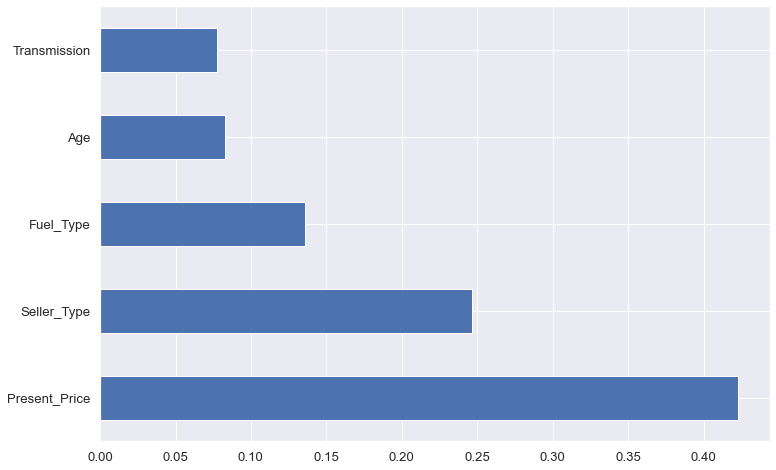

In [31]:
feat_importances = pd.Series(fea.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

In [33]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (240, 7)
X_test shape:  (61, 7)
y_train shape:  (240,)
y_test shape:  (61,)


# Standard Scaler

In [34]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Model Building

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


In [36]:
lr = LinearRegression()
lr.fit(X_train,y_train)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

xgb = GradientBoostingRegressor()
xgb.fit(X_train,y_train)

xg = XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [37]:
# make predictions on the test data
y_pred1 = lr.predict(X_test)
y_pred2 = rf.predict(X_test)
y_pred3 = xgb.predict(X_test)
y_pred4 = xg.predict(X_test)

### Linear Regression

In [38]:
print("R_squared:", r2_score(y_test,y_pred1))
print("MAE:", mean_absolute_error(y_test,y_pred1))
print("MSE:", mean_squared_error(y_test,y_pred1))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred1)))

R_squared: 0.8468053957657424
MAE: 1.2217615462332727
MSE: 3.528927253890655
RMSE: 1.878543918541873


### Random Forest

In [39]:
print("R_squared:", r2_score(y_test,y_pred2))
print("MAE:", mean_absolute_error(y_test,y_pred2))
print("MSE:", mean_squared_error(y_test,y_pred2))
print("RMSE :",np.sqrt(mean_squared_error(y_test,y_pred2)))

R_squared: 0.9613628568115115
MAE: 0.6082344262295084
MSE: 0.8900291775409833
RMSE : 0.943413577144713


### GradientBoostingRegressor

In [40]:
print("R_squared:", r2_score(y_test,y_pred3))
print("MAE:", mean_absolute_error(y_test,y_pred3))
print("MSE:", mean_squared_error(y_test,y_pred3))
print("RMSE :",np.sqrt(mean_squared_error(y_test,y_pred3)))

R_squared: 0.9718530962852889
MAE: 0.5162252645427368
MSE: 0.6483803795046991
RMSE : 0.8052207023572475


### XGBRegressor

In [41]:
print("R_squared:", r2_score(y_test,y_pred4))
print("MAE:", mean_absolute_error(y_test,y_pred4))
print("MSE:", mean_squared_error(y_test,y_pred4))
print("RMSE :",np.sqrt(mean_squared_error(y_test,y_pred4)))

R_squared: 0.9443331291925356
MAE: 0.6753776352620515
MSE: 1.282318907465424
RMSE : 1.132395208160748


### GradientBoostingRegressor is our best model with 0.97 R_square

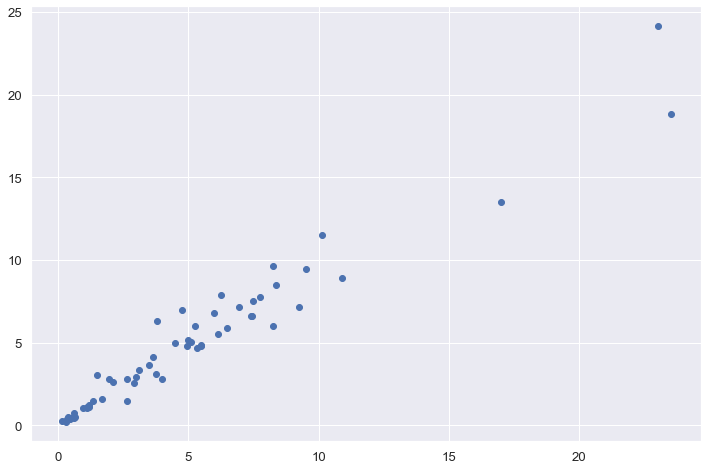

In [42]:
plt.scatter(y_test,y_pred4)

# Saving Model for deployment

In [44]:
import joblib

In [52]:
xgb = GradientBoostingRegressor()
xgb_final = xgb.fit(X_train,y_train)


In [53]:
joblib.dump(xg_final,'car_price_predictor_XGB_model')

['car_price_predictor_XGB_model']

In [ ]:
model = joblib.load('car_price_predictor')

# Prediction on new data

In [47]:
import pandas as pd
data_new = pd.DataFrame({
    'Present_Price':7,
    'Kms_Driven':300000,
    'Fuel_Type':2,
    'Seller_Type':1,
    'Transmission':1,
    'Owner':3,
    'Age':10
},index=[0])

In [48]:
model.predict(data_new)

array([3.5832994], dtype=float32)

In [49]:
from tkinter import *
import joblib

def show_entry_fields():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    p7=float(e7.get())
    
    model = joblib.load('car_price_predictor')
    data_new = pd.DataFrame({
    'Present_Price':p1,
    'Kms_Driven':p2,
    'Fuel_Type':p3,
    'Seller_Type':p4,
    'Transmission':p5,
    'Owner':p6,
    'Age':p7
},index=[0])
    result=model.predict(data_new)
    Label(master, text="Car Purchase amount").grid(row=8)
    Label(master, text=result).grid(row=10)
    print("Car Purchase amount", result[0])
    
master = Tk()
master.title("Car Price Prediction Using Machine Learning")
label = Label(master, text = "Car Price Prediction Using Machine Learning"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Present_Price").grid(row=1)
Label(master, text="Kms_Driven").grid(row=2)
Label(master, text="Fuel_Type").grid(row=3)
Label(master, text="Seller_Type").grid(row=4)
Label(master, text="Transmission").grid(row=5)
Label(master, text="Owner").grid(row=6)
Label(master, text="Age").grid(row=7)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)


Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()
 